In [188]:
import re
import requests
from bs4 import BeautifulSoup
EL1 = []
EL2 = []
EL3 = []
EL4 = []
EL5 = []
for int in range(1,54,9):
    load_url = "https://tabelog.com/tokyo/rstLst/{}/?Srt=D&SrtT=rt&sort_mode=1".format(int)
    html = requests.get(load_url)
    soup = BeautifulSoup(html.content, "html.parser")
    for element1 in soup.find_all(class_ = "list-rst__area-genre cpy-area-genre"):
        EL1.append(element1.text.strip())
    #for element2 in soup.find_all(class_ = "list-rst__pr-title cpy-pr-title"):
    #    EL2.append(element2.text.strip())
    for element2 in soup.find_all(class_ = "list-rst__comment-text cpy-comment-text"):
        EL2.append(element2.text.strip())   
    for element3 in soup.find_all(class_ = "list-rst__rate"):
        if re.findall("\d+\.\d+",element3.text.strip()) == []:
            EL3.append(0)
        for e in re.findall("\d+\.\d+",element3.text.strip()):
            EL3.append(round(float(e),1))
        #[e for inner_list in nested_list for e in inner_list]
        #EL3.append(round(float(re.findall("\d+\.\d+",element3.text.strip())),1))
    for element4 in soup.find_all(class_ = "list-rst__rvw-count-num cpy-review-count"):
        if element4.text.strip() == "-":
            EL4.append("0")        
        elif float(element4.text.strip()) >= 0 and float(element4.text.strip()) <= 50:
            EL4.append("0~50")
        elif float(element4.text.strip()) >= 51 and float(element4.text.strip()) <= 100:
            EL4.append("51~100")
        elif float(element4.text.strip()) >= 101 and float(element4.text.strip()) <= 150:
            EL4.append("101~150")
        elif float(element4.text.strip()) >= 151 and float(element4.text.strip()) <= 200:
            EL4.append("151~200")
        elif float(element4.text.strip()) >= 201 and float(element4.text.strip()) <= 250:
            EL4.append("201~250")
        elif float(element4.text.strip()) >= 251 and float(element4.text.strip()) <= 300:
            EL4.append("251~300")
        elif float(element4.text.strip()) >= 301 and float(element4.text.strip()) <= 400:
            EL4.append("301~400")
        elif float(element4.text.strip()) >= 401 and float(element4.text.strip()) <= 500:
            EL4.append("401~500")
        elif float(element4.text.strip()) >= 501 and float(element4.text.strip()) <= 700:
            EL4.append("501~700")
        elif float(element4.text.strip()) >= 701 and float(element4.text.strip()) <= 900:
            EL4.append("701~900")
        else:
            EL4.append("900~")
    for element5 in soup.find_all(class_ = "c-rating__val list-rst__budget-val cpy-dinner-budget-val"):
        if element5.text.strip() == '～￥999':
            EL5.append("～￥999")
        elif element5.text.strip() == '￥1,000～￥1,999':
            EL5.append("￥1000～￥1999")
        elif element5.text.strip() == '￥2,000～￥2,999':
            EL5.append("￥2000～￥2999")
        elif element5.text.strip() == '￥3,000～￥3,999':
            EL5.append("￥3000～￥3999")
        elif element5.text.strip() == '￥4,000～￥4,999':
            EL5.append("￥4000～￥4999")
        elif element5.text.strip() == '￥5,000～￥5,999' or element5.text.strip() == '￥6,000～￥7,999' or element5.text.strip() == '￥8,000～￥9,999':
            EL5.append("￥5000～￥9999")
        elif element5.text.strip() == '￥10,000～￥14,999' or element5.text.strip() == '￥15,000～￥19,999' or element5.text.strip() == '￥20,000～￥29,999':
            EL5.append("￥10000～￥29999")
        else:
            EL5.append("￥30000~")

In [190]:
len(EL2)

120

In [191]:
# ストップワードの除去：使用頻度の高い言葉を処理対象外にする
import MeCab

tagger = MeCab.Tagger()
tagger.parse("")
# 形態素解析の結果をリストで取得、単語ごとにリストの要素に入ってる
node = []
words = []
for h in range(len(EL2)):
    node.append(tagger.parseToNode(EL2[h]))
    hinshi = []
    hinshi_ck = []
    i = 0
    cross = []
    #助詞や助動詞は拾わない
    while node[h] is not None:
        # 品詞情報取得
        # Node.featureのフォーマット：品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用形,活用型,原形,読み,発音
        hinshi.append(node[h].feature.split(",")[0])
        hinshi_ck.append(node[h].feature.split(",")[6])
        if hinshi[i] in ("名詞") and hinshi_ck[i] != "*":
            # 表層形の取得、単語の文字が入ってる
            cross.append(node[h].surface)
            i += 1 
        elif hinshi[i] in ("動詞","形容詞") and hinshi_ck[i] != "*":
            # 形態素情報から原形情報取得
            cross.append(node[h].feature.split(",")[6])
            i += 1
        else:
            i += 1
        node[h] = node[h].next
    if cross == []:
        words.append(["なし"])
    else:
        words.append(cross)

In [192]:
print(words)

[['握る', 'の', '難しい', 'タネ', '端正', '握り', '仕上げる', 'テクニシャン'], ['東京', '六本木', '一', '丁目', 'いとう', '大将', 'にぎる'], ['年末', '大好き', '店', '駆け込む', '中'], ['松川', 'さん', 'いただく', '極上', '間人', '蟹'], ['良い', '店', 'なる', 'いく'], ['守', '破る', '離', '感じる', 'させる', '星野', '節', '堪能'], ['須賀', 'ワールド', '日本', '良い', 'さ', '噛みしめる', '１', '０'], ['なんば', 'さん', '情熱', '探究', '心', 'こもる', '鮨', '愛でる', '秋'], ['予約', '難易', '度', '料理', '正比例', 'する', 'レストラン'], ['満足', '感', '残る', 'いう', 'ちる'], ['ドラマ', '監修', '岸田', 'イズム'], ['最上', 'おもてなし', 'いただく', '洗練', 'する', 'れる', 'フレンチ'], ['光り輝く'], ['王者', '鳥', 'しき'], ['進化', 'ジャンル', '超える', '長谷川', '稔', '世界'], ['個室', '最高', '上海', '蟹', 'コース', '堪能'], ['なし'], ['載る', '予約', '困難', '店', '見る', '美味', '心', '打つ', 'れる'], ['拘る', '空間', '拘る'], ['銀座', '１', '世界一'], ['素材', '味', '最大限', '生かす', '料理', '数々'], ['首都', '圏', '出張'], ['今年', '松茸', '鮎', '食べる', 'れる', 'おん', '字'], ['勇', 'しゅう'], ['そこら', 'フランス', '料理', '店', '格', '違う'], ['ため息', '出る', '美味しい', 'さ'], ['上質', 'ダイナミック', '焼肉'], ['マスト'], ['毎年', '恒例', '桃', 'コース'], ['新橋', 'さん', 'カクテル', '堪能', 'する', '下

In [193]:
for f in range(len(words)):
    words[f] = ' '.join(words[f])

In [194]:
#TF-idfのライブラリをインポート
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True,token_pattern=u'(?u)\\b\\w+\\b')

In [195]:
#Tf-idfの処理
tfidf_X = []
tfidf_sort = []
index = []
feature_words=[]
import numpy as np
for t in range(len(words)):
    tfidf_X.append(vectorizer.fit_transform([words[t]]).toarray())
    tfidf_sort.append(np.sort(tfidf_X[t], axis=1)[:, ::-1])
    index.append(tfidf_X[t].argsort(axis=1)[:,::-1])
    feature_names = np.array(vectorizer.get_feature_names())
    feature_words.append(feature_names[index[t]])

In [196]:
len(feature_words)

120

In [197]:
import re
n = 2 # top何単語取るか
top_10 = []
top10_make = []
list = []
top10 = []
#quarter2 = []
#koumoku2 = []
length = []
score = []
value = []
count = []
review_c = []
price = []
janre = []
#name2 = []
pattern = r"/.+"
for j in range(len(feature_words)):
    top_10.append(feature_words[j][0][:n])
for s in range(len(top_10)):
    for r in range(len(top_10[s])):
        top10.append([top_10[s][r]])
        #quarter2.append(quarter1[s])
        #name2.append(name1[s])
        #koumoku2.append(koumoku1[s])
        value.append([tfidf_sort[s][0][r]])
        length.append([len(EL2[s])/len(top_10[s])])
        score.append([EL3[s]])
        review_c.append([EL4[s]])
        price.append([EL5[s]])
        count.append([1])
        janre.append([re.search(pattern,EL1[s]).group().strip("/")])
#for f in range(len(shinchoku1)):
#    shinchoku2 = quarter1[f]+koumoku1[f]+top1[f]+top2[f]+top3[f]+top4[f]+top5[f]+[len(data[f])]+[float(s) for s in score1[f]]
#    list.append(shinchoku2)
for f2 in range(len(top10)):
    SM = top10[f2]+length[f2]+value[f2]+score[f2]+review_c[f2]+count[f2]+price[f2]+janre[f2]
    list.append(SM)
list


[['難しい', 20.0, 0.35355339059327373, 4.8, '251~300', 1, '￥10000～￥29999', ' 寿司'],
 ['端正', 20.0, 0.35355339059327373, 4.8, '251~300', 1, '￥10000～￥29999', ' 寿司'],
 ['東京', 10.0, 0.3779644730092272, 4.8, '501~700', 1, '￥10000～￥29999', ' 寿司'],
 ['大将', 10.0, 0.3779644730092272, 4.8, '501~700', 1, '￥10000～￥29999', ' 寿司'],
 ['駆け込む', 7.5, 0.4472135954999579, 4.7, '301~400', 1, '￥30000~', ' 懐石・会席料理'],
 ['店', 7.5, 0.4472135954999579, 4.7, '301~400', 1, '￥30000~', ' 懐石・会席料理'],
 ['間人', 7.0, 0.4082482904638631, 4.7, '201~250', 1, '￥30000~', ' 割烹・小料理'],
 ['蟹', 7.0, 0.4082482904638631, 4.7, '201~250', 1, '￥30000~', ' 割烹・小料理'],
 ['良い', 8.0, 0.5, 4.7, '201~250', 1, '￥30000~', ' 寿司'],
 ['店', 8.0, 0.5, 4.7, '201~250', 1, '￥30000~', ' 寿司'],
 ['離', 9.0, 0.35355339059327373, 4.7, '51~100', 1, '￥30000~', ' 懐石・会席料理'],
 ['節', 9.0, 0.35355339059327373, 4.7, '51~100', 1, '￥30000~', ' 懐石・会席料理'],
 ['１',
  11.5,
  0.35355339059327373,
  4.7,
  '251~300',
  1,
  '￥30000~',
  ' イノベーティブ・フュージョン、創作料理'],
 ['０',
  11.5,
  0.

In [198]:
import pandas as pd
df = pd.DataFrame(list)
df.columns = ['頻出単語','文字数','TFIDF','点数','レビュー数','単語数','値段','ジャンル']
df

,頻出単語,文字数,TFIDF,点数,レビュー数,単語数,値段,ジャンル
0,難しい,20.0,0.353553,4.8,251~300,1,￥10000～￥29999,寿司
1,端正,20.0,0.353553,4.8,251~300,1,￥10000～￥29999,寿司
2,東京,10.0,0.377964,4.8,501~700,1,￥10000～￥29999,寿司
3,大将,10.0,0.377964,4.8,501~700,1,￥10000～￥29999,寿司
4,駆け込む,7.5,0.447214,4.7,301~400,1,￥30000~,懐石・会席料理
5,店,7.5,0.447214,4.7,301~400,1,￥30000~,懐石・会席料理
6,間人,7.0,0.408248,4.7,201~250,1,￥30000~,割烹・小料理
7,蟹,7.0,0.408248,4.7,201~250,1,￥30000~,割烹・小料理
8,良い,8.0,0.500000,4.7,201~250,1,￥30000~,寿司
9,店,8.0,0.500000,4.7,201~250,1,￥30000~,寿司


In [199]:
# クロス集計
df = df.pivot_table(values='TFIDF', index="点数", columns='頻出単語', aggfunc = 'sum')
# クロス集計結果を整数に変換
df = df.fillna(0)
# 結果の出力
df

頻出単語,こと,これ,しゅう,つけ,とる,なし,やく,キング,タイ,ハヤシライス,...,鮑,鮨,鯛,鰻,鳥,麺,黒毛,０,１,３
点数,,,,,,,,,,,,,,,,,,,,,
3.8,0.000000,0.707107,0.000000,0.707107,0.707107,0.0,0.707107,0.57735,0.755929,0.57735,...,0.00000,0.447214,0.353553,0.57735,0.00000,1.207107,0.353553,0.000000,0.000000,0.447214
3.9,0.707107,0.000000,0.000000,0.000000,0.000000,2.0,0.000000,0.00000,0.000000,0.00000,...,0.00000,0.301511,0.000000,0.00000,0.00000,0.930904,0.000000,0.000000,0.000000,0.000000
4.0,0.000000,0.000000,0.707107,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,...,0.57735,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4.6,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.00000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.57735,0.000000,0.000000,0.000000,0.577350,0.000000
4.7,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,...,0.00000,0.333333,0.000000,0.00000,0.00000,0.000000,0.000000,0.353553,0.353553,0.000000
4.8,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [200]:
# コレスポンデンス分析のライブラリ
import mca
# コレスポンデンス分析
ncols = df.shape[1]
# Benzécri? 補正するかどうか、データ構造の問題か、True だとエラーとなったため、False で設定
mca_ben = mca.MCA(df, ncols=ncols, benzecri=True)
mca_ben.fs_r(N=2)
mca_ben.fs_c(N=2)

array([[-0.79671028, -0.21878369],
       [ 0.33743383, -0.59946835],
       [ 1.22872247,  1.57235043],
       [ 0.33743383, -0.59946835],
       [ 0.33743383, -0.59946835],
       [-1.3075827 ,  0.31831552],
       [ 0.33743383, -0.59946835],
       [ 0.33743383, -0.59946835],
       [ 0.33743383, -0.59946835],
       [ 0.33743383, -0.59946835],
       [ 0.33743383, -0.59946835],
       [ 0.33743383, -0.59946835],
       [ 0.33743383, -0.59946835],
       [ 1.22872247,  1.57235043],
       [ 0.33743383, -0.59946835],
       [ 0.33743383, -0.59946835],
       [ 1.22872247,  1.57235043],
       [-0.79671028, -0.21878369],
       [-0.79671028, -0.21878369],
       [ 0.33743383, -0.59946835],
       [ 0.33743383, -0.59946835],
       [-2.32932754,  1.39251393],
       [ 1.22872247,  1.57235043],
       [ 1.22872247,  1.57235043],
       [ 0.33743383, -0.59946835],
       [ 0.33743383, -0.59946835],
       [ 0.33743383, -0.59946835],
       [ 1.22872247,  1.57235043],
       [ 0.33743383,

In [201]:
import pandas as pd
# 表側の座標を書き出す
result_row = pd.DataFrame(mca_ben.fs_r(N=2))
result_row.index = df.index
result_row

,0,1
点数,,
3.8,0.320660,-0.546244
3.9,-0.757107,-0.199359
4.0,1.167644,1.432747
4.6,-2.213540,1.268877
4.7,-0.960816,0.026916
4.8,-0.071245,-2.155190


In [202]:
# 表頭の座標を書き出す
result_col = pd.DataFrame(mca_ben.fs_c(N=2))
result_col.index = df.columns
result_col

,0,1
頻出単語,,
こと,-0.796710,-0.218784
これ,0.337434,-0.599468
しゅう,1.228722,1.572350
つけ,0.337434,-0.599468
とる,0.337434,-0.599468
なし,-1.307583,0.318316
やく,0.337434,-0.599468
キング,0.337434,-0.599468
タイ,0.337434,-0.599468


In [203]:
# N（成分：固有値の数）の算出:表頭と表側の少ない方から1を引いた数にする
cnt_column = len(df.columns)
cnt_index = len(df.index)

if(cnt_column >= cnt_index) :
     cnt_eigenvalue = cnt_index-1
else :
    cnt_eigenvalue = cnt_column-1

In [204]:
# 固有値（eigenvalue）と寄与率（explained variance of eigen vectors）
#一般的に固有値が1以上であるか、2軸の寄与率を合計した「累積寄与率」が80％以上であれば、元データをかなり反映していると言われる。
data = {'value': pd.Series(mca_ben.L),
            'ratio': mca_ben.expl_var(greenacre=False, N=cnt_eigenvalue)}
columns = ['value', 'ratio']
table2 = pd.DataFrame(data=data, columns=columns).fillna(0)
table2.index += 1
table2.loc['Σ'] = table2.sum()
table2.index.name = 'Factor'
print ("Principal inertias(eigenvalues):")
print(table2)
print('\n', end='')

Principal inertias(eigenvalues):
           value     ratio
Factor                    
1       0.814550  0.249763
2       0.687875  0.210921
3       0.646330  0.198182
4       0.600777  0.184214
5       0.511758  0.156919
Σ       3.261290  1.000000



In [205]:
data = np.array([mca_ben.L[:2],
                mca_ben.expl_var(greenacre=True,N=2)* 100]).T
df3 = pd.DataFrame(data=data,columns=['cλ','%c'],index=range(1,3))
print('df3\n',df3)

df3
          cλ         %c
1  0.814550  24.777340
2  0.687875  20.924099


In [206]:
# 作図用ライブラリ
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

plt.rcParams['font.family'] = 'IPAexGothic' #全体のフォントを設定
plt.rcParams["figure.figsize"] = [20, 12] # グラフのサイズを指定
plt.rcParams['font.size'] = 15 #フォントサイズを設定 default : 12
plt.rcParams['xtick.labelsize'] = 10 # 横軸のフォントサイズ
plt.rcParams['ytick.labelsize'] = 10 # 縦軸のフォントサイズ
matplotlib.font_manager._rebuild()

import random as rnd

# 図の設定（任意）
#plt.figure(figsize=(300,300))

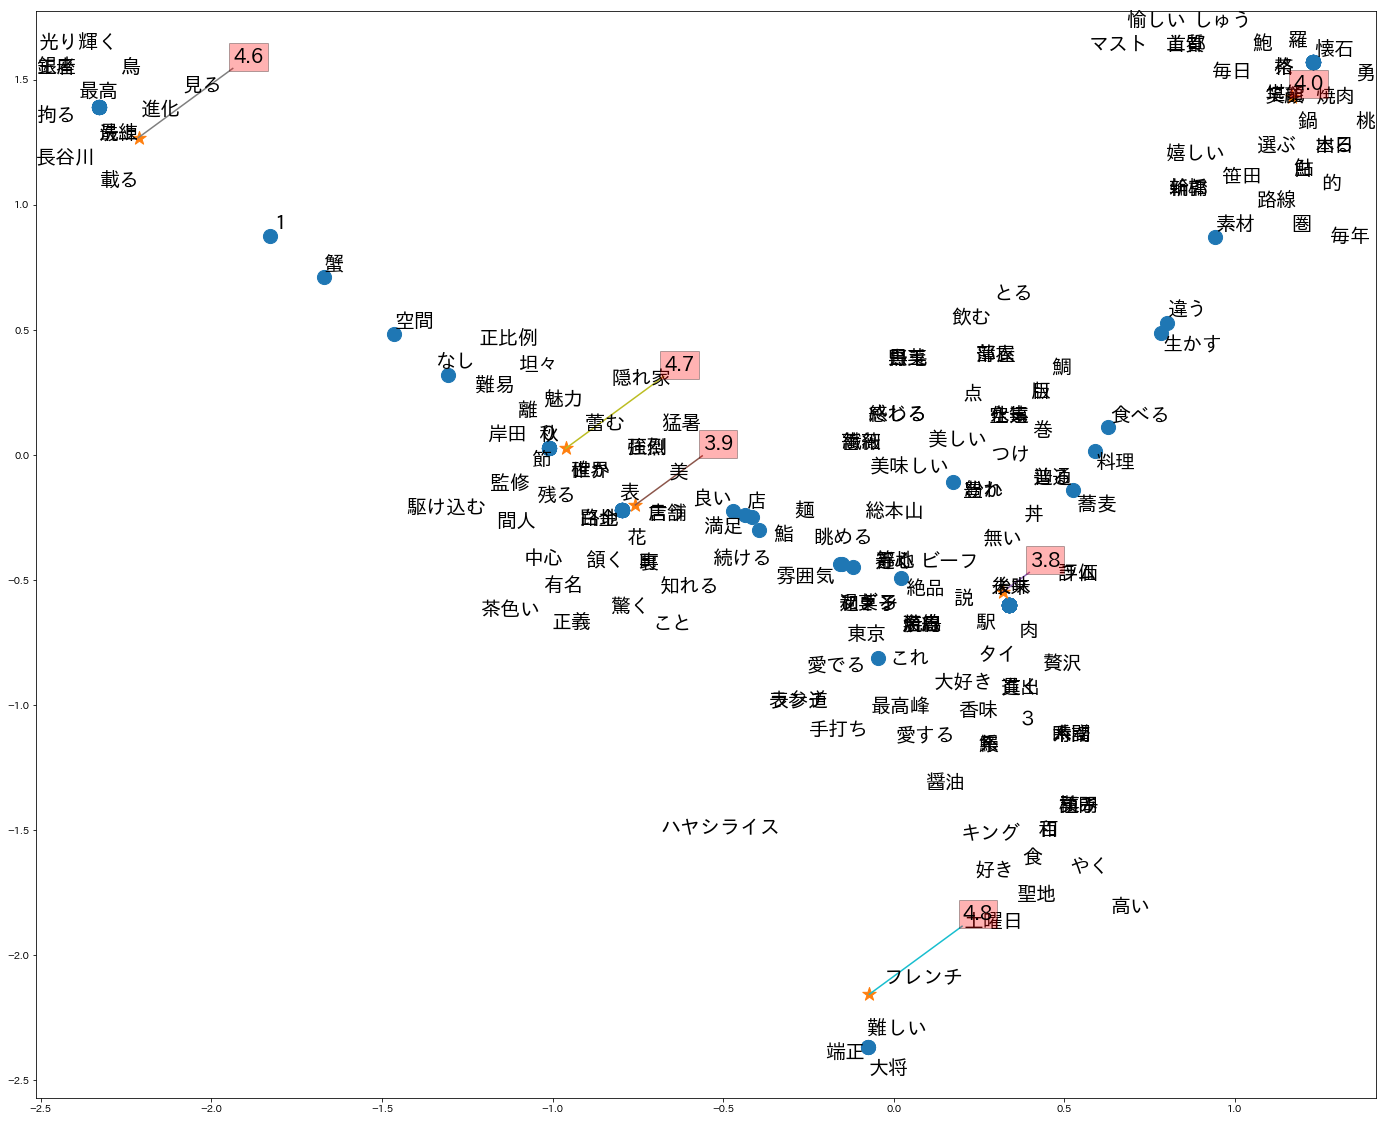

In [207]:
from adjustText import adjust_text


plt.figure(figsize=(24,20))
plt.rcParams["font.size"] = 20
# 表頭をプロット
plt.scatter(result_col[0], result_col[1], s=200, marker="o")
texts = []
# ラベル付け
cnt = 0
for i in range(len(result_col.index)):
    #r = rnd.random() * 0.3
    #texts.append(plt.text(result_col.iloc[cnt, 0]+r, result_col.iloc[cnt, 1]+r, result_col.index[i], horizontalalignment=rnd.choice(('left', 'right', 'center')), verticalalignment= rnd.choice(('top', 'bottom', 'center', 'baseline', 'center_baseline')), bbox=dict(facecolor='red', alpha=0.3)))
    texts.append(plt.text(result_col.iloc[cnt, 0], result_col.iloc[cnt, 1], result_col.index[i]))
    plt.plot([result_col.iloc[cnt, 0], result_col.iloc[cnt, 0]], [result_col.iloc[cnt, 1], result_col.iloc[cnt, 1]])
    cnt += 1

# 表側をプロット
plt.scatter(result_row[0], result_row[1], s=200, marker="*")
# ラベル付け
cnt = 0
# 重複なし
def rand_ints_nodup(a, b, k):
    r = []
    while len(r) < k:
        n = rnd.randint(a, b)
        if not n in r:
            r.append(n)
    return r
scores=[]
for i in range(len(result_row.index)):
    #params = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340]
    r = rnd.random() * 0.3
    scores.append(plt.text(result_row.iloc[cnt, 0]+r, result_row.iloc[cnt, 1]+r, result_row.index[i], bbox=dict(facecolor='red', alpha=0.3)))
    #plt.text(result_row.iloc[cnt, 0]+r, result_row.iloc[cnt, 1]+r, result_row.index[i], bbox=dict(facecolor='red', alpha=0))
    plt.plot([result_row.iloc[cnt, 0]+r, result_row.iloc[cnt, 0]], [result_row.iloc[cnt, 1]+r, result_row.iloc[cnt, 1]])
    cnt += 1
adjust_text(texts, lw=1.0)
adjust_text(scores, lw=1.0)
#ax = fig.add_subplot(111,projection='3d')
#ax.set_aspect('equal')
plt.show() 